Прогноз цен на медицинскую страховку

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv

pd.set_option('display.max_rows', None)    
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)    
pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_csv("/Users/olga.baltutskaya/Downloads/Medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


Основные характеристики:

- Возраст
- Пол
- Индекс массы тела
- Колличество детей
- Курит или не курит
- Регион
- Стоимость страховки



In [3]:
# Просмотр базовой информации
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [4]:
# Преобразование данных
df['sex'] = df['sex'].replace({'female':0 ,'male':1})
df['smoker'] = df['smoker'].replace({'no':0,'yes':1})
df['region'] = df['region'].replace({'southeast':0,'southwest':1,
                                    'northwest':2,'northeast':3})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   int64  
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [5]:
# Базовые статистики
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,2772.000,2772.000,2772.000,2772.000,2772.000,2772.000,2772.000
mean,39.110,0.507,30.701,1.102,0.203,1.438,13261.370
std,14.081,0.500,6.129,1.215,0.403,1.129,12151.769
min,18.000,0.000,15.960,0.000,0.000,0.000,1121.874
25%,26.000,0.000,26.220,0.000,0.000,0.000,4687.797
50%,39.000,1.000,30.447,1.000,0.000,1.000,9333.014
75%,51.000,1.000,34.770,2.000,0.000,2.000,16577.780
max,64.000,1.000,53.130,5.000,1.000,3.000,63770.428


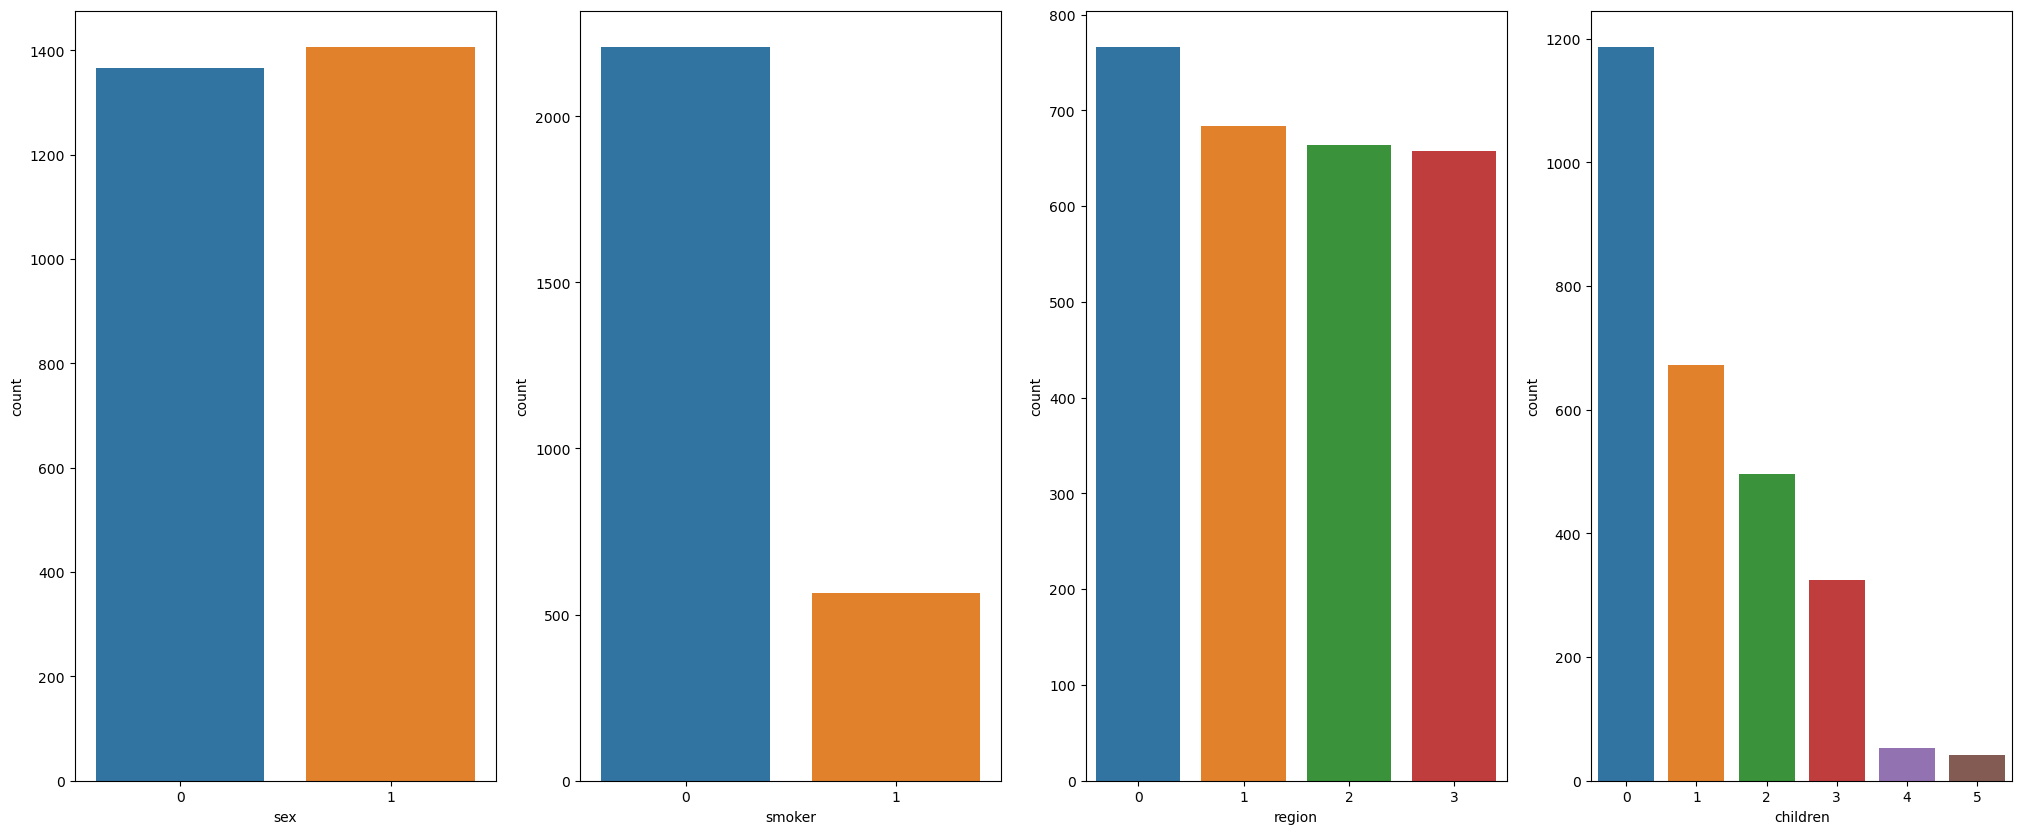

In [7]:
# Количество по признакам
def plot(df):
    fig, axes = plt.subplots(1,4, figsize=(25, 10))

    sns.countplot(ax=axes[0], x="sex", data=df)
    axes[0].tick_params(axis='x', rotation=1)

    sns.countplot(ax=axes[1], x="smoker", data=df)
    axes[1].tick_params(axis='x', rotation=1)

    sns.countplot(ax=axes[2], x="region", data=df)
    axes[2].tick_params(axis='x', rotation=1)
       
    sns.countplot(ax=axes[3], x="children", data=df)
    axes[3].tick_params(axis='x', rotation=1)

    
plot(df)

/Users/olga.baltutskaya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


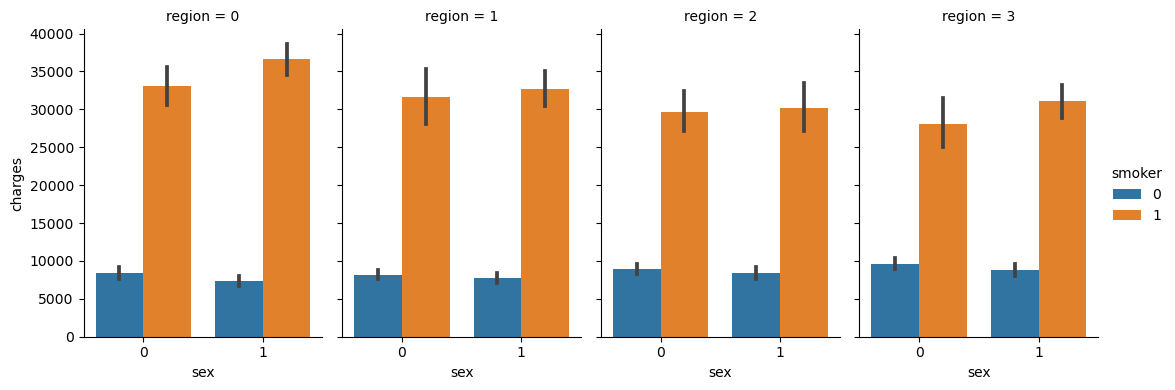

In [8]:
sns.catplot(x="sex", y="charges", hue="smoker", col="region", data=df, kind="bar", height=4, aspect=.7)
plt.show()

/Users/olga.baltutskaya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


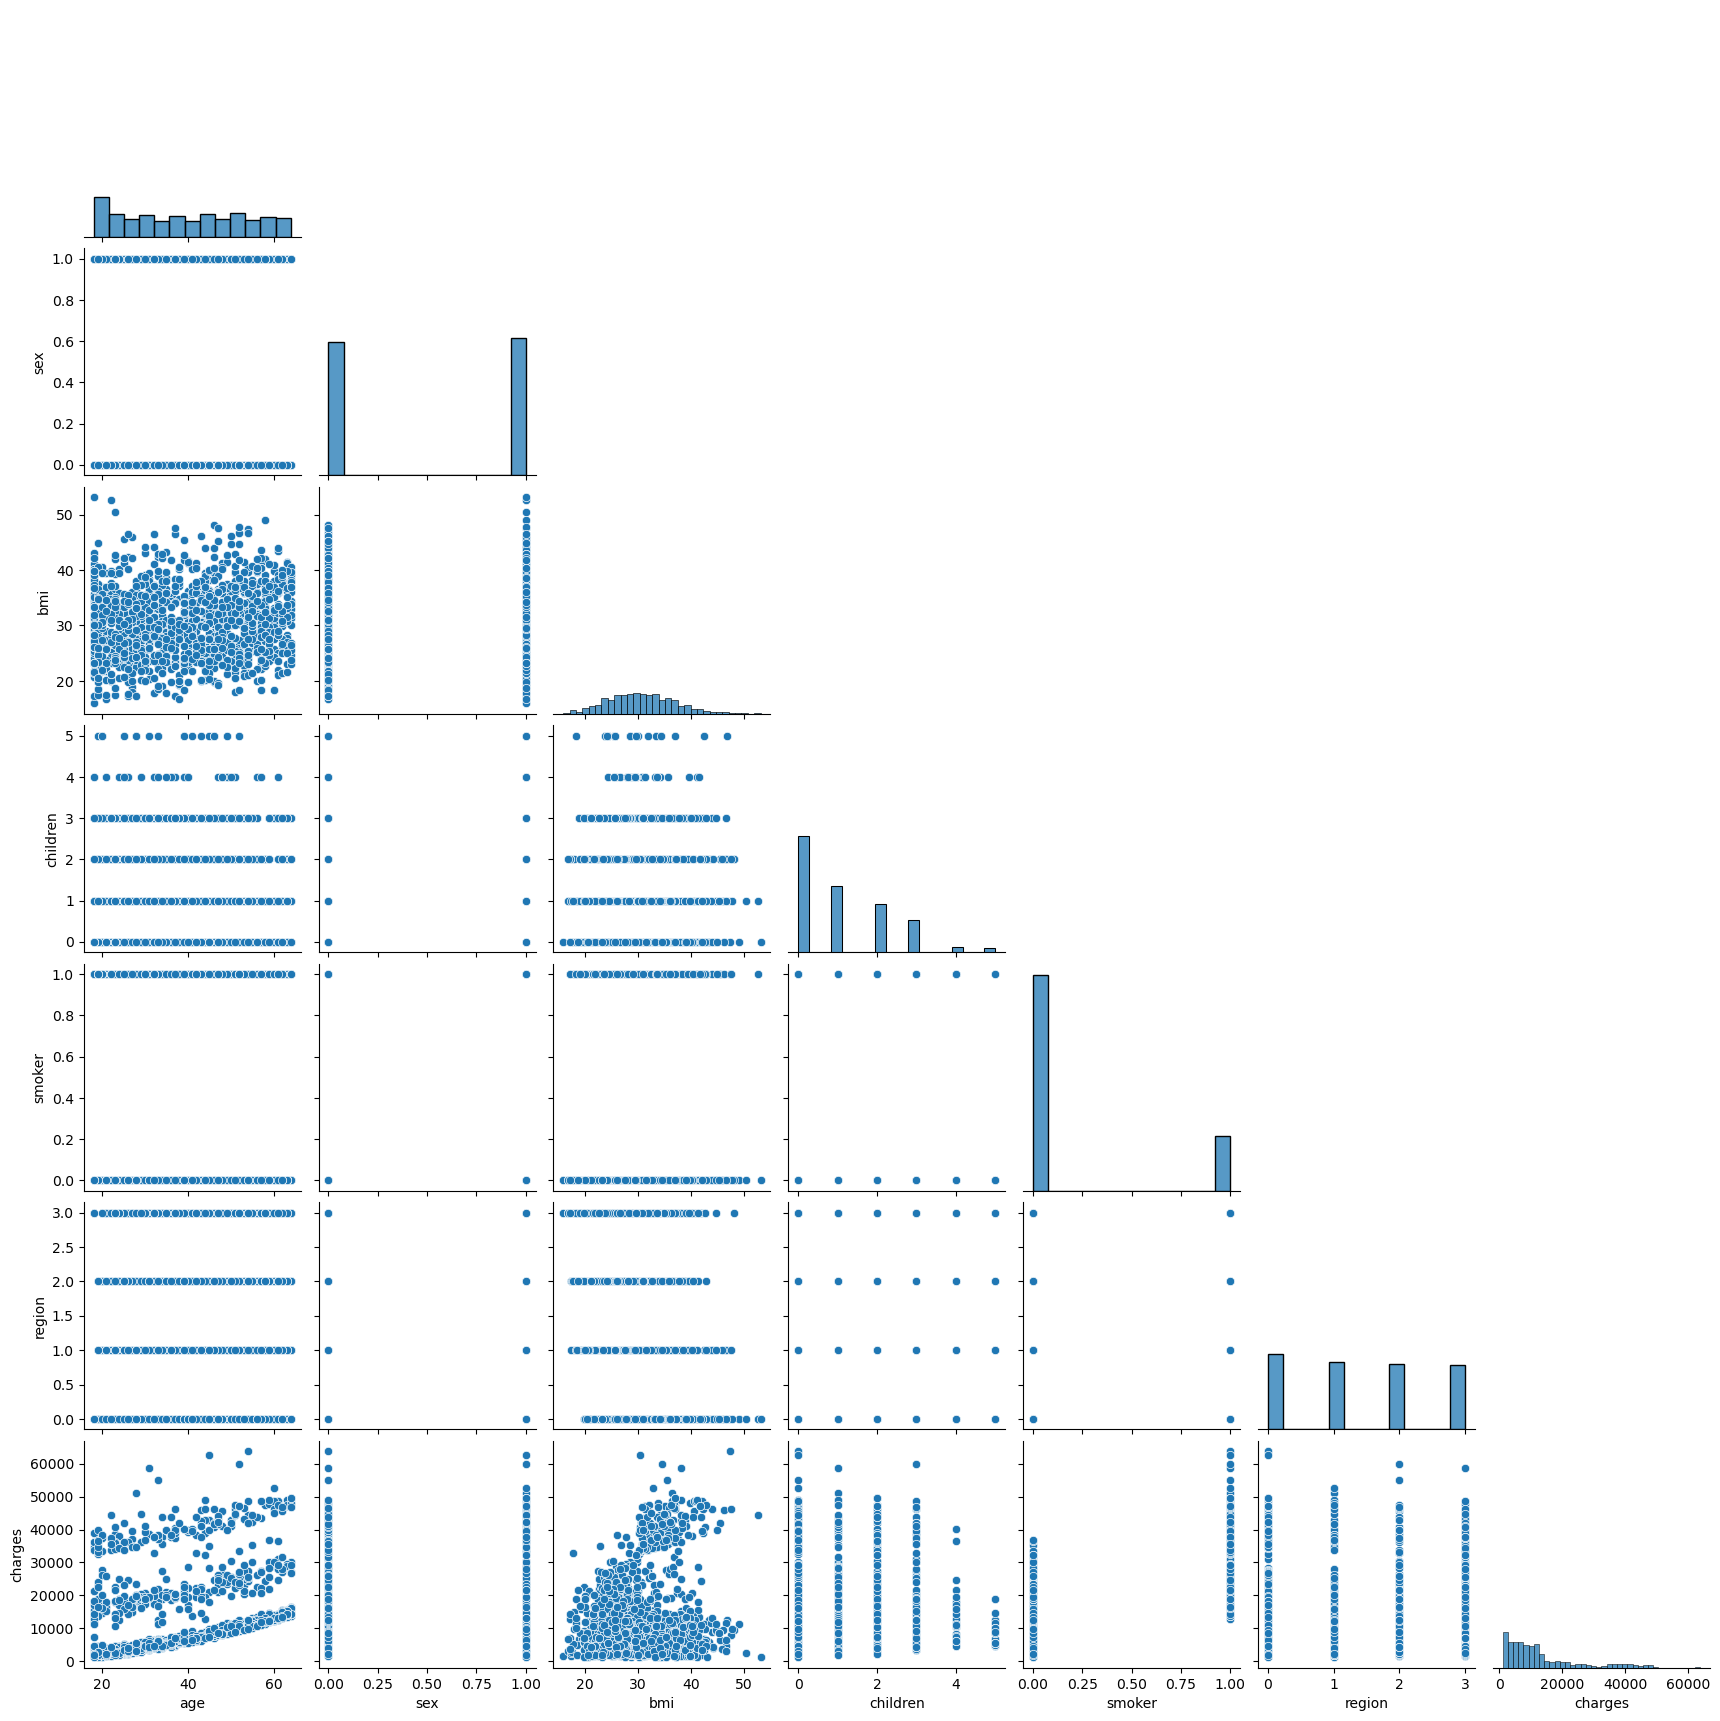

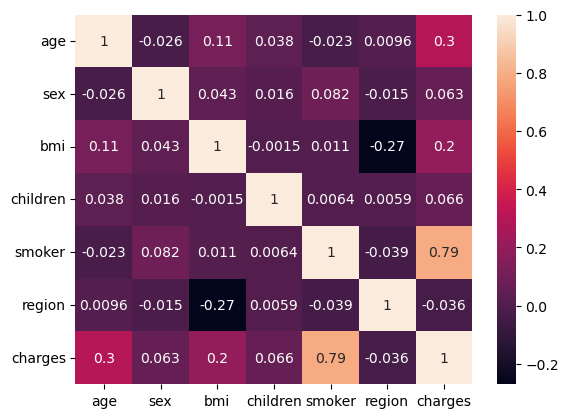

In [9]:
# Построение графиков
sns.pairplot(df,corner=True)
plt.show()

# Корреляционная матрица
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных на обучающий и тестовый наборы
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Создание и обучение модели случайного леса
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

print(f"Точность тестовых данных: {r2_score(y_test,y_pred)*100:.2f}")
print("Прогнозы цен на медицинскую страховку:")
for i in range(7):
    print(f"Предсказанная цена: {y_pred[i]:.2f}, Фактическая цена: {y_test.iloc[i]:.2f}")

Точность тестовых данных: 95.14
Прогнозы цен на медицинскую страховку:
Предсказанная цена: 9767.90, Фактическая цена: 8988.16
Предсказанная цена: 28357.70, Фактическая цена: 28101.33
Предсказанная цена: 12395.13, Фактическая цена: 12032.33
Предсказанная цена: 1684.01, Фактическая цена: 1682.60
Предсказанная цена: 4774.13, Фактическая цена: 3393.36
Предсказанная цена: 24360.25, Фактическая цена: 24106.91
Предсказанная цена: 4791.28, Фактическая цена: 4746.34


In [15]:
from xgboost import XGBRegressor

# Создание и обучение модели экстремального градиентного бустинга
xg_model = XGBRegressor()
xg_model.fit(X_train,y_train)
y_pred = xg_model.predict(X_test)
print(f"Точность тестовых данных: {r2_score(y_test,y_pred)*100:.2f}")
print("Прогнозы цен на медицинскую страховку:")
for i in range(10):
    print(f"Предсказанная цена: {y_pred[i]:.2f}, Фактическая цена: {y_test.iloc[i]:.2f}")

Точность тестовых данных: 95.57
Прогнозы цен на медицинскую страховку:
Предсказанная цена: 8592.95, Фактическая цена: 8988.16
Предсказанная цена: 28214.59, Фактическая цена: 28101.33
Предсказанная цена: 12210.41, Фактическая цена: 12032.33
Предсказанная цена: 1786.89, Фактическая цена: 1682.60
Предсказанная цена: 4467.12, Фактическая цена: 3393.36
Предсказанная цена: 23961.45, Фактическая цена: 24106.91
Предсказанная цена: 11116.60, Фактическая цена: 4746.34
Предсказанная цена: 47306.93, Фактическая цена: 47269.85
Предсказанная цена: 10557.18, Фактическая цена: 8556.91
Предсказанная цена: 3290.28, Фактическая цена: 2639.04


In [14]:
from sklearn.ensemble import ExtraTreesRegressor

# Создание и обучение модели регрессора Extra Trees
ex_model = ExtraTreesRegressor()
ex_model.fit(X_train,y_train)
y_pred = ex_model.predict(X_test)

print(f"Точность тестовых данных: {r2_score(y_test,y_pred)*100:.2f}")
print("Прогнозы цен на медицинскую страховку:")
for i in range(10):
    print(f"Предсказанная цена: {y_pred[i]:.2f}, Фактическая цена: {y_test.iloc[i]:.2f}")

Точность тестовых данных: 96.13
Прогнозы цен на медицинскую страховку:
Предсказанная цена: 8988.16, Фактическая цена: 8988.16
Предсказанная цена: 28101.33, Фактическая цена: 28101.33
Предсказанная цена: 12032.33, Фактическая цена: 12032.33
Предсказанная цена: 1682.60, Фактическая цена: 1682.60
Предсказанная цена: 3393.36, Фактическая цена: 3393.36
Предсказанная цена: 24106.91, Фактическая цена: 24106.91
Предсказанная цена: 4792.87, Фактическая цена: 4746.34
Предсказанная цена: 47269.85, Фактическая цена: 47269.85
Предсказанная цена: 8879.15, Фактическая цена: 8556.91
Предсказанная цена: 2639.04, Фактическая цена: 2639.04
